In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Aufgabe 31
## a)

In [2]:
df=pd.read_csv('aufg_a.csv')
df

,x,"""y_0"""
0,0.5,0.132939
1,1.5,0.204351
2,2.5,0.197394
3,3.5,0.157457
4,4.5,0.139232
5,5.5,0.060324
6,6.5,0.056360
7,7.5,0.051944


In [3]:
df.columns

Index(['x', ' "y_0"'], dtype='object')

In [4]:
x=df.x.to_numpy()
y=df[' "y_0"'].to_numpy()
x,y

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 array([0.132939, 0.204351, 0.197394, 0.157457, 0.139232, 0.060324,
        0.05636 , 0.051944]))

In [5]:
A= np.column_stack([x**0,x,x**2,x**3,x**4,x**5,x**6])
print('Designmatrix A:')
print(f'{A.shape = }')
print(f'{A = }')

Designmatrix A:
A.shape = (8, 7)
A = array([[1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
        6.25000000e-02, 3.12500000e-02, 1.56250000e-02],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00, 7.59375000e+00, 1.13906250e+01],
       [1.00000000e+00, 2.50000000e+00, 6.25000000e+00, 1.56250000e+01,
        3.90625000e+01, 9.76562500e+01, 2.44140625e+02],
       [1.00000000e+00, 3.50000000e+00, 1.22500000e+01, 4.28750000e+01,
        1.50062500e+02, 5.25218750e+02, 1.83826562e+03],
       [1.00000000e+00, 4.50000000e+00, 2.02500000e+01, 9.11250000e+01,
        4.10062500e+02, 1.84528125e+03, 8.30376562e+03],
       [1.00000000e+00, 5.50000000e+00, 3.02500000e+01, 1.66375000e+02,
        9.15062500e+02, 5.03284375e+03, 2.76806406e+04],
       [1.00000000e+00, 6.50000000e+00, 4.22500000e+01, 2.74625000e+02,
        1.78506250e+03, 1.16029062e+04, 7.54188906e+04],
       [1.00000000e+00, 7.50000000e+00, 5.62500000e+01, 4.21

In [6]:
a = np.linalg.inv(A.T @ A) @ A.T @ y
print(f'{a.shape = }')
print(f'{a = }')

a.shape = (7,)
a = array([-6.74453270e-02,  6.09609038e-01, -5.13748213e-01,  2.10566521e-01,
       -4.52007751e-02,  4.78568049e-03, -1.96288196e-04])


In [7]:
def polynom_6(x,a):
    return a[0]*x**0 + a[1]*x + a[2]*x**2 + a[3]*x**3 + a[4]*x**4 + a[5]*x**5 + a[6]*x**6


In [8]:
val= np.linspace(0,8)

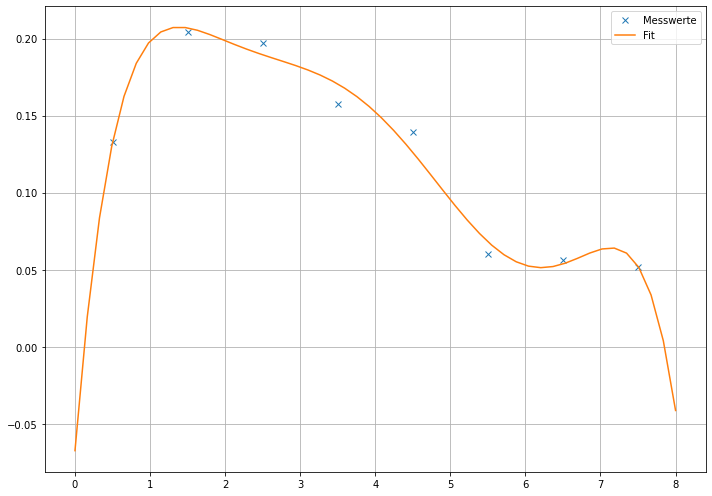

In [9]:
plt.figure(figsize=(10,7))
plt.plot(x,y,'x',label="Messwerte")
plt.plot(val,polynom_6(val,a),label="Fit")
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

## b)

In [10]:
C = ([[-1,1,0,0,0,0,0,0],
      [1,-2,1,0,0,0,0,0],
      [0,1,-2,1,0,0,0,0],
      [0,0,1,-2,1,0,0,0],
      [0,0,0,1,-2,1,0,0],
      [0,0,0,0,1,-2,1,0],
      [0,0,0,0,0,1,-2,1],
      [0,0,0,0,0,0,-1,1]])
C = np.array(C)
lam = ([0.1,0.3,0.7,3,10])
print('Ableitungsmatrix C:')
print(f'{C.shape = }')
print(f'{C = }')

Ableitungsmatrix C:
C.shape = (8, 8)
C = array([[-1,  1,  0,  0,  0,  0,  0,  0],
       [ 1, -2,  1,  0,  0,  0,  0,  0],
       [ 0,  1, -2,  1,  0,  0,  0,  0],
       [ 0,  0,  1, -2,  1,  0,  0,  0],
       [ 0,  0,  0,  1, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  1, -2,  1,  0],
       [ 0,  0,  0,  0,  0,  1, -2,  1],
       [ 0,  0,  0,  0,  0,  0, -1,  1]])


In [11]:
for i in range(len(lam)):
    a_reg = np.linalg.inv(A.T @ A + lam[i] * (C@A).T @ (C @ A)) @ A.T @ y
    with np.printoptions(precision=2):
        print(f'a_reg(lam={lam[i]}) = \n {a_reg}')

a_reg(lam=0.1) = 
 [ 5.28e-02  2.60e-01 -1.93e-01  7.70e-02 -1.72e-02  1.90e-03 -8.10e-05]
a_reg(lam=0.3) = 
 [ 1.11e-01  1.08e-01 -6.43e-02  2.49e-02 -6.34e-03  7.89e-04 -3.63e-05]
a_reg(lam=0.7) = 
 [ 1.42e-01  4.37e-02 -1.72e-02  6.46e-03 -2.36e-03  3.59e-04 -1.81e-05]
a_reg(lam=3) = 
 [ 1.70e-01  7.97e-03 -1.06e-03 -1.07e-04 -4.92e-04  1.08e-04 -6.00e-06]
a_reg(lam=10) = 
 [ 1.74e-01  2.10e-03 -2.10e-03 -1.88e-04 -1.44e-04  3.94e-05 -2.29e-06]


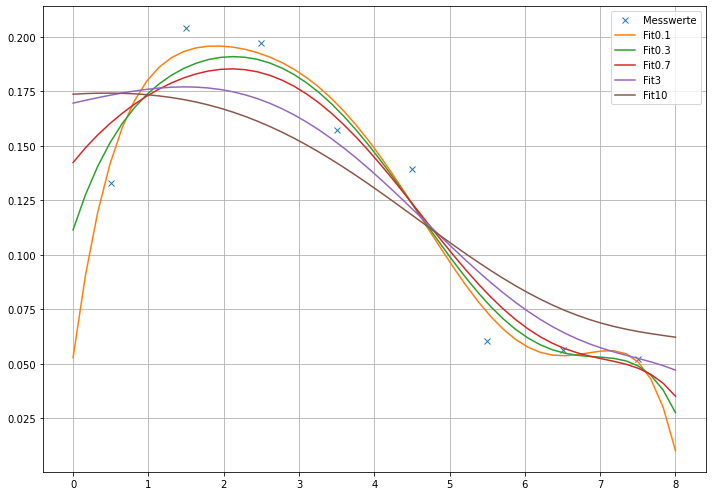

In [12]:
plt.figure(figsize=(10,7))
plt.plot(x,y,'x',label="Messwerte")
for i in range(len(lam)):
    a_reg = np.linalg.inv(A.T @ A + lam[i] * (C@A).T @ (C @ A)) @ A.T @ y
    plt.plot(val,polynom_6(val,a_reg),label="Fit"+ str(lam[i]))

plt.grid()
plt.legend(loc='best')
plt.tight_layout()    

## c)

In [13]:
df_2=pd.read_csv('aufg_c.csv')

### Fehler des Mittelwertes ist: $\frac{\text{Standardabweichung}}{\sqrt{\text{Anzahl der Werte}}}$

In [14]:
df_2['mean'] = df_2.iloc[:, 1:51].mean(axis=1)
df_2['err_mean'] = df_2.iloc[:, 1:51].std(axis=1,ddof=1) / np.sqrt(50)

In [15]:
df_2.head()

,x,"""y_0","""y_1","""y_2","""y_3","""y_4","""y_5","""y_6","""y_7","""y_8",...,"""y_42","""y_43","""y_44","""y_45","""y_46","""y_47","""y_48","""y_49",mean,err_mean
0,0.5,0.103939,0.149753,0.112739,0.184439,0.145831,0.113267,0.155455,0.155187,0.105173,...,0.122147,0.146955,0.076564,0.114331,0.132773,0.167562,0.135968,0.131620,0.124865,0.003522
1,1.5,0.219092,0.193544,0.160651,0.170565,0.184050,0.163337,0.212139,0.166457,0.186264,...,0.147765,0.164665,0.238038,0.203325,0.203236,0.213183,0.223799,0.148379,0.179360,0.004211
2,2.5,0.177677,0.166459,0.236241,0.205570,0.197066,0.230060,0.170907,0.181053,0.186724,...,0.144067,0.239231,0.103315,0.198792,0.201374,0.197383,0.126766,0.193543,0.196042,0.004397
3,3.5,0.139580,0.163861,0.167301,0.141728,0.143816,0.161717,0.153893,0.131928,0.110090,...,0.213696,0.157921,0.229623,0.207216,0.125185,0.119271,0.212534,0.193191,0.164007,0.004500
4,4.5,0.115663,0.112004,0.111168,0.102507,0.108234,0.085693,0.113646,0.148677,0.199207,...,0.161769,0.111842,0.142766,0.097612,0.132306,0.101199,0.085060,0.094930,0.122767,0.003173


In [17]:
y_mean = df_2['mean'].to_numpy()
y_err = df_2['err_mean'].to_numpy()

### Berechne W nach dem Script mit $\frac{1}{\text{Fehler}^2}$auf der Diagonalen

In [18]:
W = np.eye(8,8) * (1/y_err**2)
print('Gewichtungsmatrix W:')
print(f'{W.shape = }')
print(f'W =\n{W}')

Gewichtungsmatrix W:
W.shape = (8, 8)
W =
[[ 80629.34129337      0.              0.              0.
       0.              0.              0.              0.        ]
 [     0.          56403.43595568      0.              0.
       0.              0.              0.              0.        ]
 [     0.              0.          51717.53013034      0.
       0.              0.              0.              0.        ]
 [     0.              0.              0.          49385.61212761
       0.              0.              0.              0.        ]
 [     0.              0.              0.              0.
   99332.59310101      0.              0.              0.        ]
 [     0.              0.              0.              0.
       0.         152282.27863975      0.              0.        ]
 [     0.              0.              0.              0.
       0.              0.         296112.26907967      0.        ]
 [     0.              0.              0.              0.
       0.        

### $\vec{a} = (A^T W A)^-1 A^T W \vec{y}$

In [19]:
a_w = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ y_mean
print(f'{a_w.shape = }')
print(f'{a_w = }')

a_w.shape = (7,)
a_w = array([ 1.03975570e-01,  1.92955342e-02,  6.17000739e-02, -3.75650688e-02,
        7.91884317e-03, -7.34894171e-04,  2.56958525e-05])


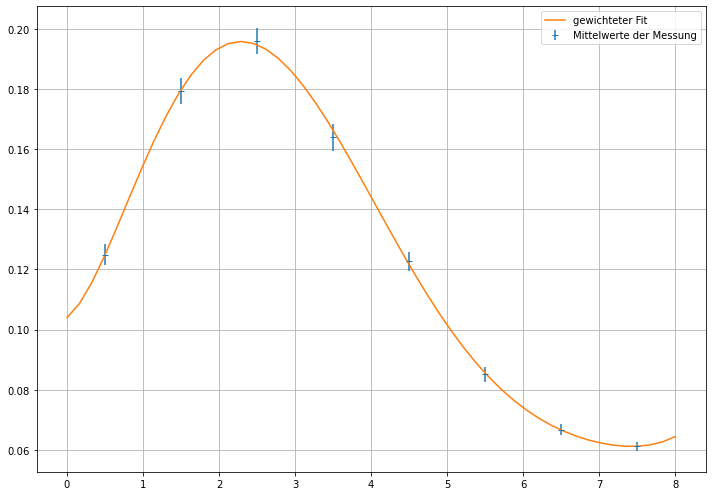

In [20]:
plt.figure(figsize=(10,7))
#plt.plot(x,y_mean,'x',label="Mittelwerte")
plt.errorbar(x,y_mean, yerr= y_err,fmt="_", label = "Mittelwerte der Messung")
#plt.plot(x,y, "o", label = "Messwerte aus a)")
plt.plot(val,polynom_6(val,a_w),label="gewichteter Fit")
#plt.plot(val,polynom_6(val,a),label="ungewichteter Fit")
plt.grid()
plt.legend(loc='best')
plt.tight_layout()